<a href="https://colab.research.google.com/github/Mittra19/K-SVD/blob/main/Dictionary_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit

In [ ]:
from sklearn.datasets import make_regression
X, y = make_regression(noise=4, random_state=0)
reg = OrthogonalMatchingPursuit().fit(X, y)
reg.score(X, y)

0.9991964219358707

In [ ]:
X

array([[ 0.52201212, -0.74586233, -0.76478197, ...,  0.24107233,
        -0.02128299, -2.43813256],
       [-1.40610477,  1.61424955,  0.43077113, ..., -1.54825432,
         0.40389602,  1.93671246],
       [ 0.81615458, -1.13698783, -0.08872441, ...,  0.10117749,
        -0.21549664,  0.02932343],
       ...,
       [-0.26716118,  1.69183964, -1.43349522, ...,  1.06547809,
         0.08182017, -0.12996586],
       [ 0.78257888, -0.74747318,  0.81797761, ..., -0.42870207,
        -1.36475823, -0.02186991],
       [ 0.40959412, -1.38552558, -0.1334914 , ...,  0.79855081,
         0.32978808, -0.9317254 ]])

In [ ]:
y

array([ -83.08654302,  -86.87929348,  143.64879825,   53.11767063,
       -137.12562568,  -76.17911331,  120.97431801, -152.98264176,
         92.4214761 , -178.17606253,  255.89033696,  109.30931948,
        -25.14676048,  122.48056043,  -63.43119168,   63.1024734 ,
        170.08532165,  298.62248374,  147.08015727,   13.98238816,
        -63.20215872, -160.3243681 ,   98.48277148,  -64.15689374,
         89.44793595, -199.88331975, -235.11439276,  -92.80330438,
         65.97137792, -240.35957012,   58.53672285,   17.64118695,
         39.19532947, -159.67494116,  214.40536597, -115.37493987,
         17.39566243,   17.03944817, -190.71934088, -253.19313503,
        152.34316164,   45.80067497,   94.40807603,    3.99305466,
        -13.84420769, -151.37817847, -104.29954489, -219.2608145 ,
        -30.42886711, -162.87549183, -103.4805689 ,  -25.85948739,
       -140.55707091,   22.21891754,  -26.26358559,   25.29018877,
         -4.88580563, -156.20005888,   57.62585988,    4.61951

In [ ]:
reg.predict(X[:1,])

array([-78.38545074])

Automatically created module for IPython interactive environment
100
rows:  100
columns:  512
[ 46  68  76 101 123 158 195 226 227 268 269 355 359 399 467 492 494]


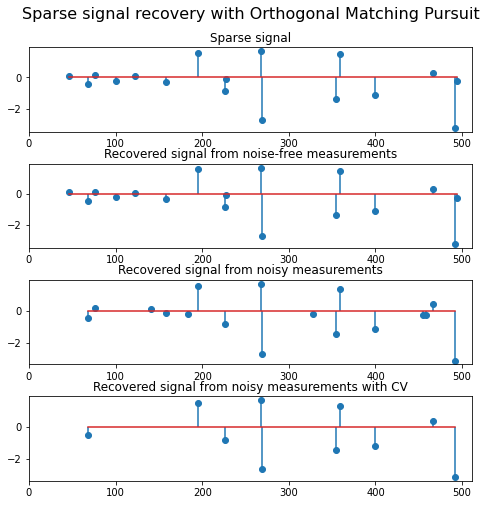

In [ ]:
print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.linear_model import OrthogonalMatchingPursuitCV
from sklearn.datasets import make_sparse_coded_signal

n_components, n_features = 512, 100
n_nonzero_coefs = 17

# generate the data

# y = Xw
# |x|_0 = n_nonzero_coefs

y, X, w = make_sparse_coded_signal(n_samples=1,
                                   n_components=n_components,
                                   n_features=n_features,
                                   n_nonzero_coefs=n_nonzero_coefs,
                                   random_state=0)
print(len(y))
idx, = w.nonzero()
print("rows: ",str(len(X)))
print("columns: ",str(len(X[0])))
print(idx)
# distort the clean signal
y_noisy = y + 0.05 * np.random.randn(len(y))

# plot the sparse signal
plt.figure(figsize=(7, 7))
plt.subplot(4, 1, 1)
plt.xlim(0, 512)
plt.title("Sparse signal")
plt.stem(idx, w[idx], use_line_collection=True)

# plot the noise-free reconstruction
omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs)
omp.fit(X, y)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 2)
plt.xlim(0, 512)
plt.title("Recovered signal from noise-free measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction
omp.fit(X, y_noisy)
coef = omp.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 3)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

# plot the noisy reconstruction with number of non-zeros set by CV
omp_cv = OrthogonalMatchingPursuitCV()
omp_cv.fit(X, y_noisy)
coef = omp_cv.coef_
idx_r, = coef.nonzero()
plt.subplot(4, 1, 4)
plt.xlim(0, 512)
plt.title("Recovered signal from noisy measurements with CV")
plt.stem(idx_r, coef[idx_r], use_line_collection=True)

plt.subplots_adjust(0.06, 0.04, 0.94, 0.90, 0.20, 0.38)
plt.suptitle('Sparse signal recovery with Orthogonal Matching Pursuit',
             fontsize=16)
plt.show()

In [ ]:
from sklearn.decomposition import DictionaryLearning
import numpy as np

In [ ]:
from sklearn import datasets

In [ ]:
digits = datasets.load_digits()

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
dl = DictionaryLearning(n_components=36, fit_algorithm='lars', transform_algorithm='omp', n_jobs=-1)

In [ ]:
X_dict = dl.fit_transform(digits.data[:20,:])

In [ ]:
xd = dl.fit(digits.data[:20,:])

In [ ]:
X_dict

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  5.54075807e+01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+

In [ ]:
X_dict[0].shape

(36,)

In [ ]:
a = X_dict[0]
a = np.array(a)
a = a.reshape(a.shape[0], 1)
a.shape

(36, 1)

In [ ]:
import matplotlib.pyplot as plt


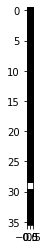

In [ ]:
plt.imshow(a, cmap='gray')

In [ ]:
from sklearn.decomposition import dict_learning

In [ ]:
V, U, E = dict_learning(digits.data[:30, :], n_components=36, n_jobs = -1, alpha=1, max_iter=1000, tol=1e-8,
                 method='lars')

In [ ]:
V

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
U

array([[-0.00548362, -0.05009001,  0.03903189, ..., -0.10421281,
        -0.04598236, -0.25511911],
       [ 0.        ,  0.        ,  0.10733126, ...,  0.23255107,
         0.19677398,  0.01788854],
       [ 0.        ,  0.        , -0.12040366, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.142994  , ..., -0.214491  ,
        -0.23236525, -0.01787425],
       [ 0.        ,  0.        , -0.12881496, ..., -0.16561924,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.21767868, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
U.shape

(36, 64)

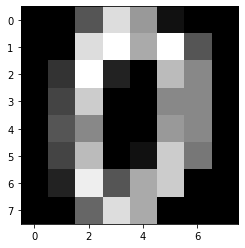

In [ ]:
plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')

In [ ]:
U[0].shape

(64,)

In [ ]:
U[0]

array([-0.00548362, -0.05009001,  0.03903189,  0.1809765 ,  0.18932348,
       -0.07895904, -0.04952146, -0.10439134,  0.0278849 , -0.03229385,
       -0.02909015, -0.08642242, -0.09927473, -0.10733263, -0.21535614,
        0.1797347 , -0.02668094, -0.01217039, -0.1195586 ,  0.01365493,
       -0.00827955,  0.25696743, -0.19872378,  0.06342216,  0.05242533,
       -0.16836608,  0.2088332 , -0.01389573,  0.11380729, -0.05128352,
        0.07511503, -0.098652  , -0.06333169, -0.20261162, -0.0140037 ,
        0.00198789, -0.03081474,  0.02427815,  0.17956065, -0.25685646,
        0.05700482,  0.1280963 , -0.16831927,  0.01257833, -0.11018511,
       -0.07790486, -0.07666956, -0.31110451, -0.01393695, -0.02371481,
       -0.13538448, -0.03451165,  0.18182617, -0.14239278, -0.07960388,
       -0.15422495,  0.16347914,  0.06810161,  0.0272953 , -0.19579799,
        0.02167881, -0.10421281, -0.04598236, -0.25511911])

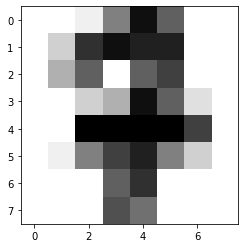

In [ ]:
plt.imshow(U[35].reshape(6, 6), cmap='gray')

#K-SVD

In [1]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.linear_model import OrthogonalMatchingPursuit

In [2]:
#Import data
from sklearn import datasets
digits = datasets.load_digits()

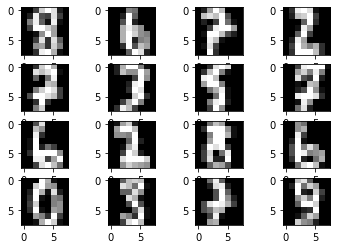

In [3]:
#Display data
import random
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4, 4)
for i in range(4):
  for j in range(4):
    k = random.randint(0, digits.data.shape[0])
    dg = digits.data[k].reshape(8, 8)
    axs[i, j].imshow(dg, cmap='gray')

plt.show()

In [4]:
#Sparse Coding Stage
def sparse_encode(A, Y, n_nonzero_coefs , fit_intercept, normalize):
  omp = OrthogonalMatchingPursuit(n_nonzero_coefs=n_nonzero_coefs, fit_intercept= fit_intercept, normalize= normalize)
  omp.fit(A, Y)
  coef = omp.coef_
  return coef

In [5]:
coef.shape

NameError: ignored

In [ ]:
coef

array([[55.40758071,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , 64.87680633,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , 66.24198065, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [7]:
#Dictionary Update Stage
tol = 1e-6 #tolerance
max_iter = 10 #maximum number of iteration
n_components = 500 #Number of atoms in the dictionary
n_nonzero_coefs = 0

In [35]:
def update_dict(A, coef):
  #print("shape: ",A.shape[1])
  for j in range(A.shape[1]):
    #Define Sigma_j0 that use the atom a_j0
    Sigma_j0 = np.where(coef[j, :]!=0)[0]
    #print("Sigma_j0: ", Sigma_j0[0], " length: ",Sigma_j0[0])
    if len(Sigma_j0) == 0:
      print("len of Sigma_j0 is 0")
      continue
    #Compute the residual matrix E_j0
    E_j0 = normalize(digits.data.T, axis=0, norm='l2') - np.dot(A, coef.T)
    #Restrict E_j0 by choosing only the columns corresponding to Sigma_j0 and obtain Er_j0
    Er_j0 = E_j0[:, Sigma_j0]
    #Apply SVD Er_j0 = U*D*V.T. Update the dictionary atom a_j0 = u1 and the representations by xR_j0 = D[1, 1].v1
    U, S, Vh = np.linalg.svd(Er_j0)
    #print("shape: ",U[:, 0, None].shape)
    #print("shape: ",A[:, j, None].shape)
    A[:, j, None] = U[:, 0, None]
    #print("coef[j, Sigma_j0]: ",coef[j, Sigma_j0], "sigma_j0: ", Sigma_j0)
    coef[j, Sigma_j0] = S[0]*Vh[0, :]
    #print(np.linalg.norm(E_j0))
    if(np.linalg.norm(E_j0)<tol):
      break
  return A, coef, np.linalg.norm(E_j0)

In [40]:
#Dictionary initialisation
k = 0
M = 500 #Choose the value of M, i.e. the number of features/
A = np.array(digits.data[:M, :].T)
error = []
#print(A.shape)
A = normalize(A, axis=0, norm='l2') #Normalise the columns of the matrix
#print(A)
for i in range(1, 50):
  er = 0
  for k in range(i):
    x = sparse_encode(A = A, Y = normalize(digits.data.T, axis=0, norm='l2'), n_nonzero_coefs = 4, fit_intercept= False, normalize= False)
    A, x, err = update_dict(A, x)
    er = err + er
  er = er/i
  error.append(er)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_omp.py:387: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_X=copy_X, return_path=return_path)


In [41]:
error

[57.35104989845242,
 84.22746629510144,
 119.29328681503485,
 134.17862000379245,
 140.05984675552065,
 102.58997079065519,
 104.7606577423669,
 119.06788932890149,
 109.34571021433202,
 108.16618713243092,
 115.44316674002943,
 118.72999952884476,
 117.68125772295419,
 110.00104600320034,
 127.72620390183786,
 114.53430587700608,
 102.84574240899259,
 122.39640773821263,
 107.65530576699594,
 118.32752711372447,
 133.49750003238017,
 114.27371625020555,
 114.6413116401791,
 127.13826109461603,
 119.62920145773181,
 133.72555579233554,
 109.61309739147998,
 123.81470546468447,
 130.48513586350356,
 114.01494631965998,
 129.6933808023125,
 120.20970136351048,
 118.27908118136088,
 114.82266359303381,
 124.15890029034162,
 116.92475294427724,
 116.12470768262679,
 136.54794929496592,
 108.43244204765443,
 107.34483914967652,
 118.54763909602457,
 115.34334563024082,
 127.87816719706137,
 123.24855761108716,
 119.14879269418597,
 125.21858795068002,
 123.93308234748329,
 119.0152170437636

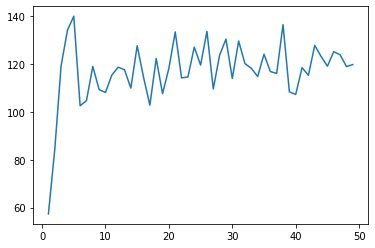

In [43]:
plt.plot([i for i in range(1,50)], error)

In [30]:
A

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.01716754],
       [-0.25724587,  0.        ,  0.        , ...,  0.        ,
         0.0357485 ,  0.18884294],
       ...,
       [ 0.        , -0.12575446,  0.24153867, ...,  0.10326426,
         0.        ,  0.2575131 ],
       [ 0.        ,  0.        ,  0.1358655 , ...,  0.        ,
         0.        ,  0.18884294],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


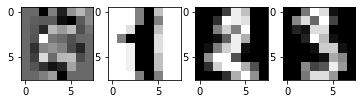

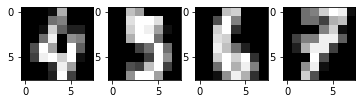

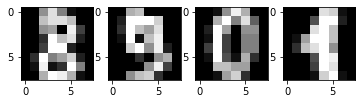

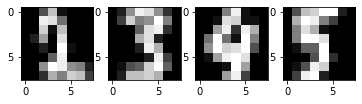

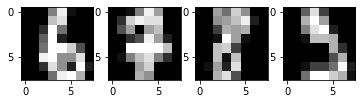

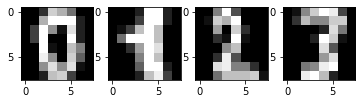

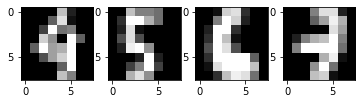

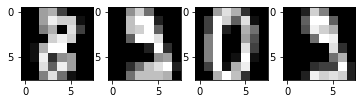

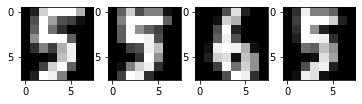

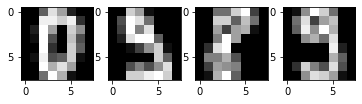

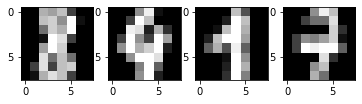

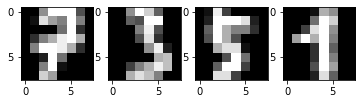

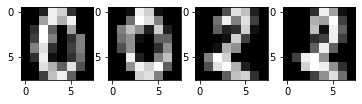

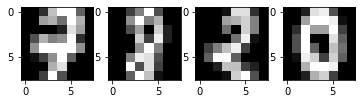

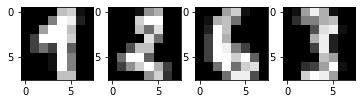

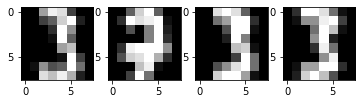

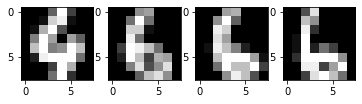

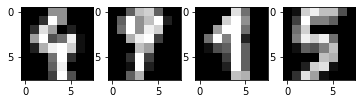

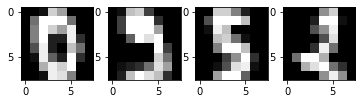

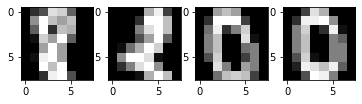

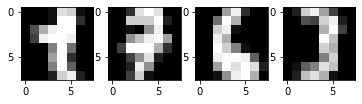

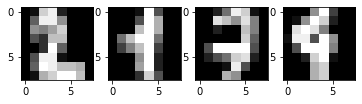

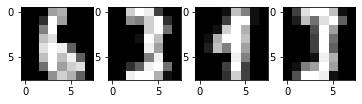

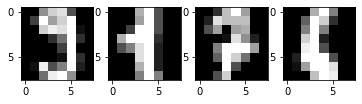

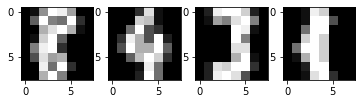

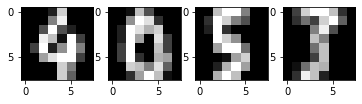

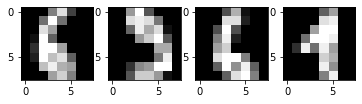

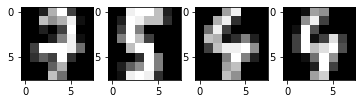

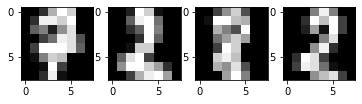

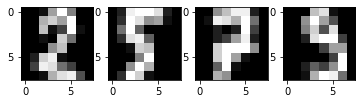

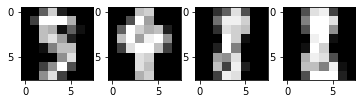

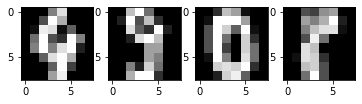

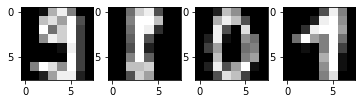

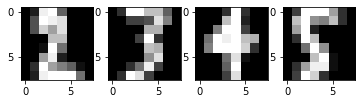

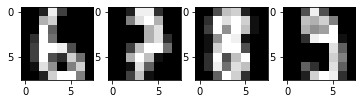

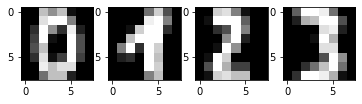

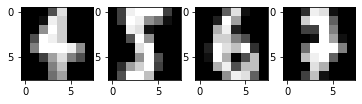

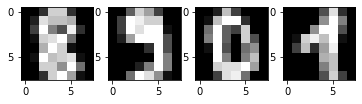

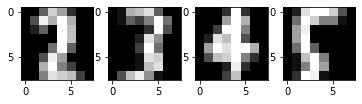

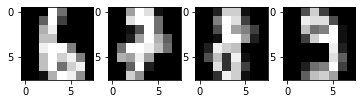

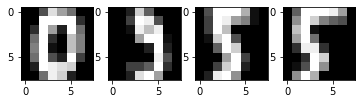

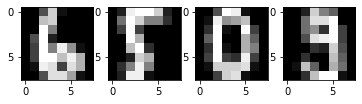

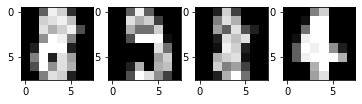

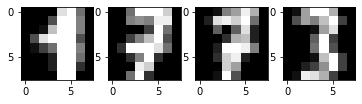

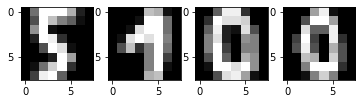

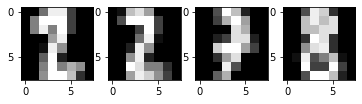

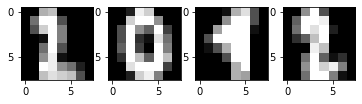

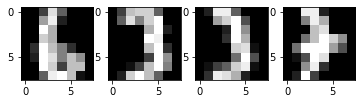

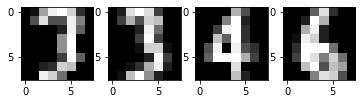

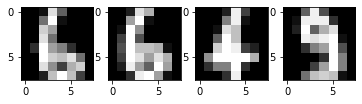

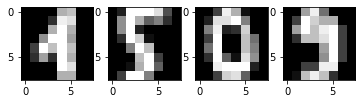

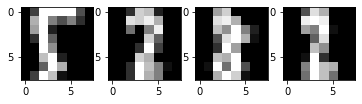

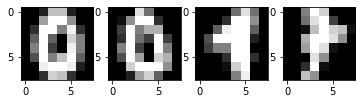

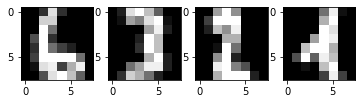

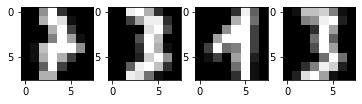

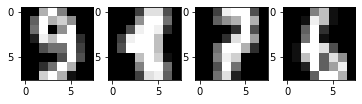

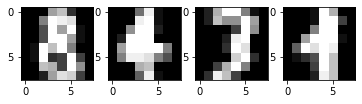

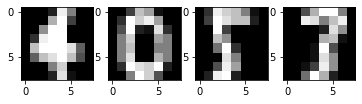

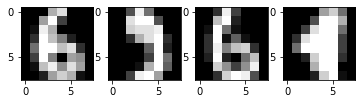

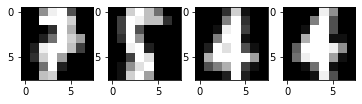

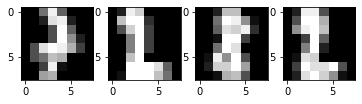

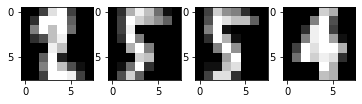

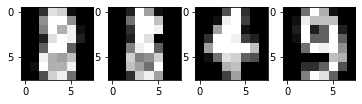

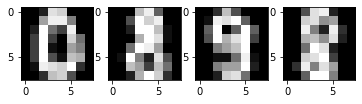

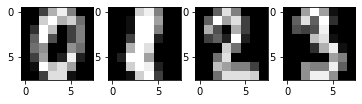

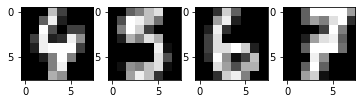

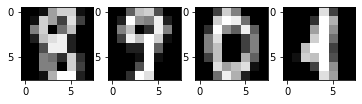

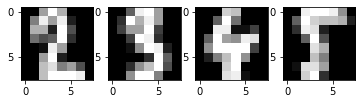

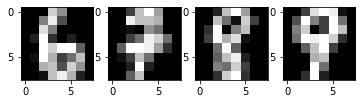

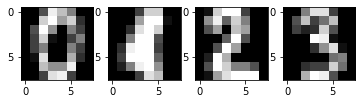

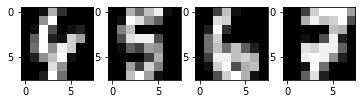

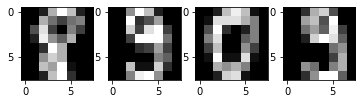

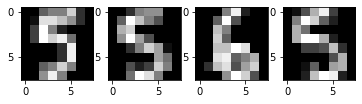

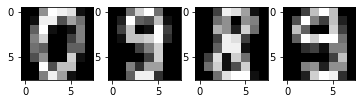

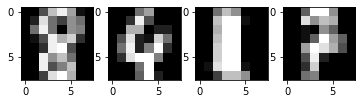

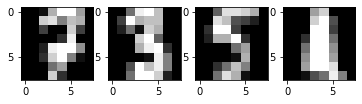

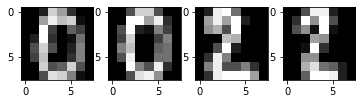

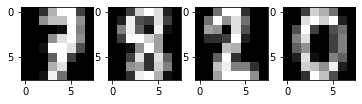

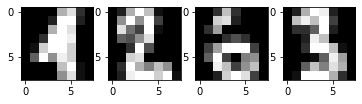

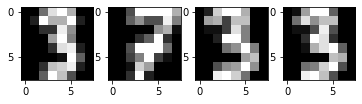

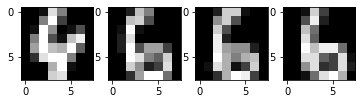

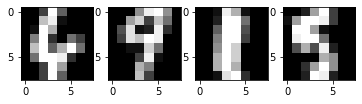

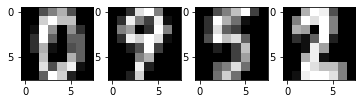

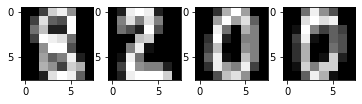

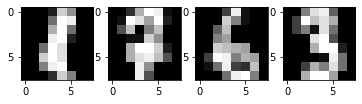

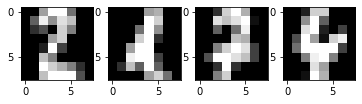

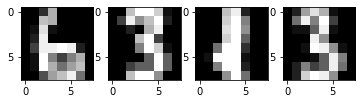

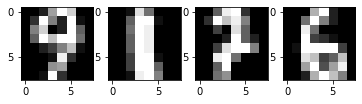

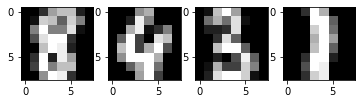

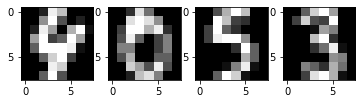

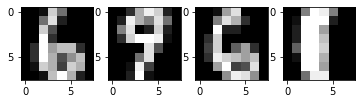

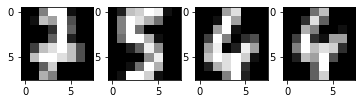

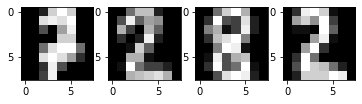

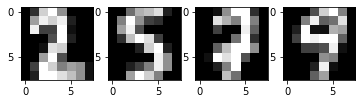

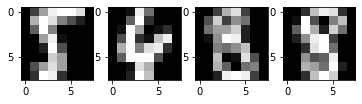

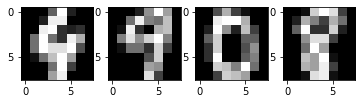

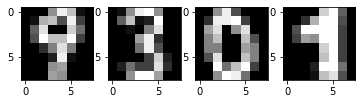

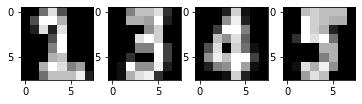

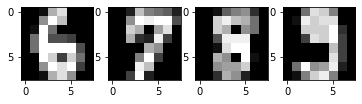

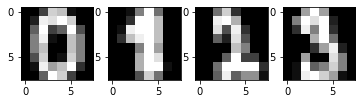

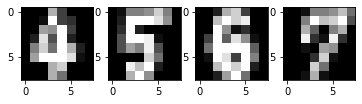

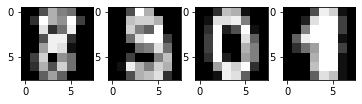

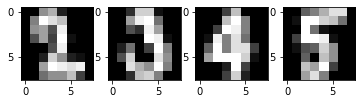

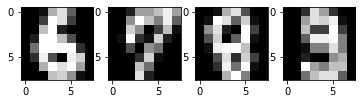

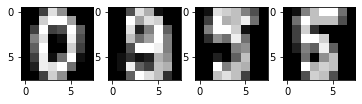

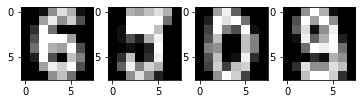

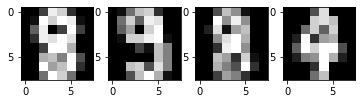

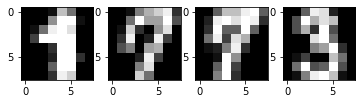

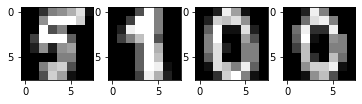

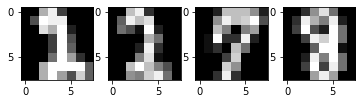

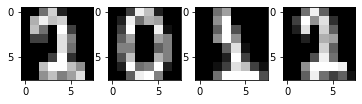

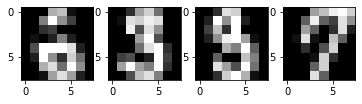

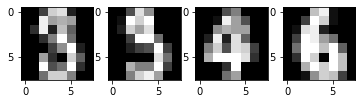

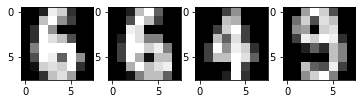

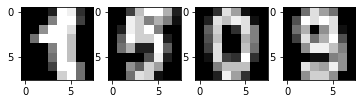

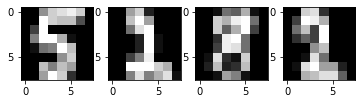

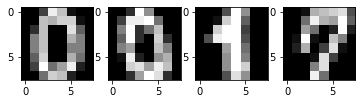

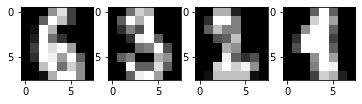

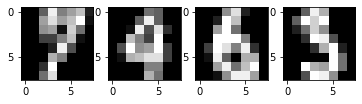

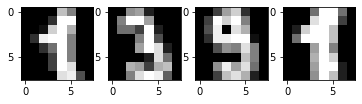

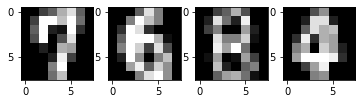

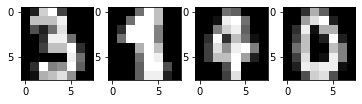

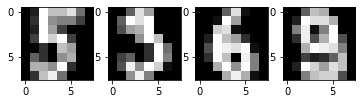

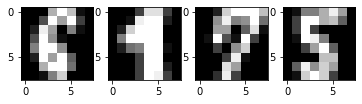

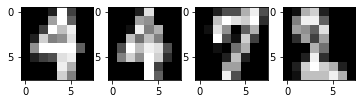

In [31]:
#fig, axs = plt.subplots(125, 4, figsize=(6,6))
k=0
for i in range(125):
#  for j in range(4):
    #k = random.randint(0,499)
    #axs[i, j].imshow(final_dict[:,k].reshape(8, 8), cmap='gray', interpolation='none')
    fig = plt.figure(i)
    fig.add_subplot(141)
    plt.imshow(A[:,k].reshape(8, 8), cmap='gray')
    k = k+1
    fig.add_subplot(142)
    plt.imshow(A[:,k].reshape(8, 8), cmap='gray')
    k = k+1
    fig.add_subplot(143)
    plt.imshow(A[:,k].reshape(8, 8), cmap='gray')
    k = k+1
    fig.add_subplot(144)
    plt.imshow(A[:,k].reshape(8, 8), cmap='gray')
    k = k+1
plt.show()

In [25]:
arr = np.array([[0, 0, 2, 1], [0, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0]])

result = np.where(arr[0, :]!=0)[0]
#print(result[0])
#listOfCoordinates= list(zip(result[0], result[1]))
#listOfCoordinates
#result = result[0]
#a = len(result[0])
#a
result

array([2, 3])

In [ ]:
for k in range(4):
  wk = np.nonzero(arr[k, :])[0]

wk.size

0

In [ ]:
arr2 = np.array([[0, 0, 2, 1], [0, 0, 0, 0], [1, 1, 0, 0], [0, 0, 0, 0]])
arr2[0, result] = 10

In [ ]:
arr2

array([[ 0,  0, 10, 10],
       [ 0,  0,  0,  0],
       [ 1,  1,  0,  0],
       [ 0,  0,  0,  0]])

In [ ]:
arr[:, result]

array([], shape=(4, 0), dtype=int64)